In [3]:
from numpy import sqrt, dot, array,conjugate, loadtxt,empty,exp,pi, arange,shape
from pylab import plot, show,imshow
from scipy.special import erf

# Question 1

Consider a spin $1$ particle. The eigen states are given by

$|+\rangle=\begin{pmatrix}1\\0\\0\end{pmatrix}, |0\rangle=\begin{pmatrix}0\\1\\0\end{pmatrix}
|-\rangle=\begin{pmatrix}0\\1\\0\end{pmatrix}$

The spin matricies (ignoring $\hbar$) are given by
$S_Z=\begin{bmatrix}1 & 0 &0 \\0 & 1 & 0\\0 & 0&1 \end{bmatrix},\\
S_Y=\frac{1}{\sqrt{2}}\begin{bmatrix}0 & -i &0 \\i & 0 & -i\\0 & i&0 \end{bmatrix},\\
S_X=\frac{1}{\sqrt{2}}\begin{bmatrix}0 & 1 &0 \\1 & 0 & 1\\0 & 1&0 \end{bmatrix}.$



## Part A:

Using arrays show that $[S_x,S_y]=i S_Z, [S_y,S_z]=iS_x, and [S_z,S_x]=iS_y$ where the square brackets are the commutators, and show that $S^2=2$

In [37]:
Sx=array([[0,1,0],[1,0,1],[0,1,0]])/sqrt(2)
Sy=array([[0,-1j,0],[1j,0,-1j],[0,1j,0]])/sqrt(2)
Sz=array([[1,0,0],[0,0,0],[0,0,-1]])

In [38]:
print(dot(Sx,Sy)-dot(Sy,Sx)) #should =iSz

[[ 0.+1.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.-1.j]]


In [39]:
print(dot(Sy,Sz)-dot(Sz,Sy)) #should =iSx


[[ 0.+0.j          0.+0.70710678j  0.+0.j        ]
 [ 0.+0.70710678j  0.+0.j          0.+0.70710678j]
 [ 0.+0.j          0.+0.70710678j  0.+0.j        ]]


In [40]:
print(dot(Sz,Sx)-dot(Sx,Sz)) #should =iSy

[[ 0.          0.70710678  0.        ]
 [-0.70710678  0.          0.70710678]
 [ 0.         -0.70710678  0.        ]]


In [41]:
dot(Sx,Sx)+dot(Sy,Sy)+dot(Sz,Sz)

array([[ 2.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  2.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  2.+0.j]])

## Part B:

Consider a wavefunction $|\psi\rangle=\frac{2}{\sqrt{6}}|+\rangle-\frac{i}{\sqrt{6}}|0\rangle+\frac{i}{\sqrt{6}}|-\rangle$

Use vector multiplication to show that $|\psi\rangle$ is normalized to $1$

Then find $\langle S_x \rangle, \langle S_y \rangle, \langle S_z \rangle$, where $\langle A \rangle=\langle \psi |A\psi|\rangle$ You can import conjugate from numpy to convert the kets into bras.
 

In [79]:
psi=array([2,0-1j,1j])/sqrt(6)
plus=array([1,0,0])
zero=array([0,1,0])
minus=array([0,0,1])
psi1=(2*plus-1j*zero+1j*minus)/sqrt(6)
dot(conjugate(psi1),psi1)
print(psi)

[ 0.81649658+0.j          0.00000000-0.40824829j  0.00000000+0.40824829j]


In [80]:
dot(conj(psi),dot(Sx,psi))

(-0.23570226039551589+0j)

In [46]:
dot(conjugate(psi),dot(Sy,psi))

(-0.47140452079103179+0j)

In [53]:
dot(conjugate(psi),dot(Sz,psi))

(0.50000000000000011+0j)

In [83]:
shape(conjugate(psi))

(3,)

# Question 2

In radial coordinates $(r,\theta)$ you learned that the magnitudes of the velocity and acceleration of an object are given by $v=\sqrt{\left(\frac{dr}{dt}\right)^2+\left(r\frac{d\theta}{dt}\right)^2}$ and $a=\sqrt{\left[\frac{d^2r}{dt^2}-r\left(\frac{d\theta}{dt} \right)^2\right]^2 +\left[r\frac{d^2\theta}{dt}+2\frac{dr}{dt}\frac{d\theta}{dt}\right]^2}$

Download the data file "midterm_radar_data.txt" from D2L and import into python. The first column is time in seconds, the second is $r$ in km, and the third colum is $\theta$ in radians. 

Calculate the first and second derivatives of $r$ and $\theta$ using the central difference method (this means you won't get the endpoints, which is fine). Then calculate and plot the speed as a function of time. Hint: This is sampled data, so watch what derivative formulas you use. Secondly, your step size in this case is 4 seconds.

## Extra Credit: 
Calculate the magnitude of the acceleration and plot.

In [62]:
data=loadtxt("midterm_radar_data.txt",float)

In [63]:
time=data[:,0]
r=data[:,1]
theta=data[:,2]


In [69]:
def cent_diff(h,func):
    N=len(func)
    diffpoints=empty(N-2,float)
    for i in range(1,N-2):
        diffpoints[i]=(func[i]-func[i-1])/(2*h)
        
    return(diffpoints)

In [70]:
def cent_diff2(h,func):
    N=len(func)
    diffpoints=empty(N-2,float)   
    for i in range(1,N-2):
        diffpoints[i]=(func[i+1]-2*func[i]+func[i-1])/h**2

    return(diffpoints)

In [71]:
dr=cent_diff(4,r)
dr2=cent_diff2(4,r)
dtheta=cent_diff(4,theta)
dtheta2=cent_diff(4,theta)

v=sqrt(dr**2+(r[1:-1]*dtheta)**2)
a=sqrt((dr2-(r[1:-1]*dtheta)**2)**2+(r[1:-1]*dtheta2+2*dr*dtheta)**2)

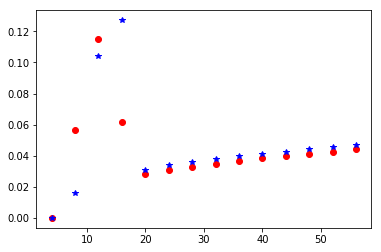

In [78]:
plot(time[1:-1],a,'ro')
plot(time[1:-1],v,'b*')

show()

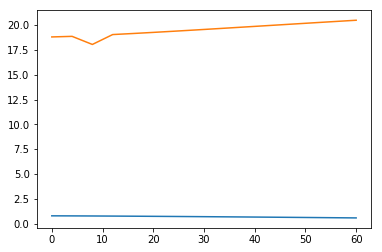

In [76]:
plot(time,theta)
plot(time,r)
show()

# Question 3

When planning for underground pipes, engineers need to know the temperature of the ground. A model for the temperature at various depths $x$ is given by

$\frac{T(x,t)-T_s}{T_i-T_s}=erf\left(\frac{x}{s\sqrt{\alpha t}}\right)=\frac{2}{\sqrt{\pi}}\int_0^{\frac{x}{2\sqrt{\alpha t}}}e^{-u^2}du$

where $\alpha=0.138\times 10^{-6}m^2/s$ is the thermal diffusivity of the soil, $T_s=-15^{\circ}$C is the surface temperature, $T_i=12^{\circ}$C is the intital soil termperature at a depth $x$.

## Part A

Find the temperture at a depth $x=1$m after $30$ days ($t=2.592 \times 10^6$s) using adaptive trapezoidal rule with an error of $1\times10^{-6}$ on the integral.

In [86]:
def function(x):
    return (exp(-x**2))

def integrate_trap(slices, a,b):
    h=(b-a)/slices
    integral=0.5*(function(a)+function(b))
    for k in range(1,slices):
        integral+=function(a+k*h)
    return(integral*h)

In [12]:
def adapt_trap(error,N,a,b):
    
    diff=2*error
    while (abs(diff)>error):
        int_1=integrate_trap(N,a,b)
        int_2=integrate_trap(2*N,a,b)
        diff=(int_2-int_1)/3.
        N=N*2
        #print("N= ",N/2," integral=, ",int_2," error, ",diff)
    return(int_2)

In [18]:
alpha=0.138e-6
Ts=-15.
Ti=12.
tdays=30
tsec=tdays*3600*24
x=1
a=0
b=x/(2*sqrt(alpha*tsec))
b

0.83601286865117508

In [19]:
integral=adapt_trap(1e-6,1,a,b)*2/sqrt(pi)
integral

0.76291277326601958

In [20]:
tsec

2592000

In [22]:
Temperature=integral*(Ti-Ts)+Ts
print(Temperature)

5.59864487818


## Part B

For a depth of $x=0.5$m plot the temperature for forty days with a time interval of one day. 

In [17]:
a=0
x=1
days=arange(1,41,1)
time=days*3600*24
Tempd=[]
for t in time:
    b=x/(2*sqrt(alpha*t))

    integral=adapt_trap(1e-6,1,a,b)*2/sqrt(pi)
    Tempd.append(integral*(Ti-Ts)+Ts)


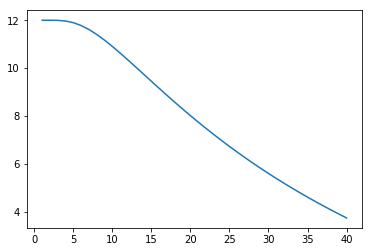

In [257]:
plot(days,Tempd)
show()

## Extra Credit

Make a 3D plot with temperature along the z-axis and time and depth along the x- and y- axes with $1<T\leq 40$ days and depth in meters as $1<x\leq 40$ m in one meter increments. The command imshow from pylab might be good here.

In [279]:
a=0
x=1
days=arange(1,41,1)
depth=linspace(1,1.1,40)
time=days*3600*24
Data=empty([len(days),len(depth)],float)
for i in range(len(depth)):
    for j in range(len(days)):
        b=depth[i]/(2*sqrt(alpha*time[j]))

        integral=adapt_trap(1e-6,1,a,b)*2/sqrt(pi)
        Data[i,j]=integral*(Ti-Ts)+Ts
        

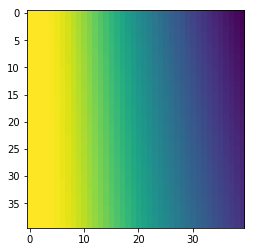

In [280]:
imshow(Data)
show()

In [276]:
Data

array([[ 12.        ,  11.99985548,  11.99498585,  11.9674647 ,
         11.89795371,  11.77857347,  11.61168431,  11.40464184,
         11.16613001,  10.90433498],
       [ 12.        ,  11.9998862 ,  11.99575216,  11.97133583,
         11.90794273,  11.79705742,  11.64003189,  11.44336043,
         11.21513177,  10.96316908],
       [ 12.        ,  11.99987741,  11.99640723,  11.97477696,
         11.91703362,  11.81414566,  11.66653452,  11.47986486,
         11.26163458,  11.01929581],
       [ 12.        ,  11.9999031 ,  11.99696623,  11.9778319 ,
         11.92529858,  11.82992995,  11.69129396,  11.5142595 ,
         11.3057405 ,  11.07281204],
       [ 12.        ,  11.99992359,  11.99744244,  11.98054049,
         11.93280487,  11.84449722,  11.71440778,  11.54664532,
         11.34754902,  11.12381278],
       [ 12.        ,  11.99993989,  11.99784743,  11.98293889,
         11.93959313,  11.85792971,  11.7359694 ,  11.57711992,
         11.38715702,  11.17239111],
       [ 1

In [1]:
from numpy import diff

In [2]:
help(diff)

Help on function diff in module numpy.lib.function_base:

diff(a, n=1, axis=-1)
    Calculate the n-th discrete difference along given axis.
    
    The first difference is given by ``out[n] = a[n+1] - a[n]`` along
    the given axis, higher differences are calculated by using `diff`
    recursively.
    
    Parameters
    ----------
    a : array_like
        Input array
    n : int, optional
        The number of times values are differenced.
    axis : int, optional
        The axis along which the difference is taken, default is the last axis.
    
    Returns
    -------
    diff : ndarray
        The n-th differences. The shape of the output is the same as `a`
        except along `axis` where the dimension is smaller by `n`. The
        type of the output is the same as that of the input.
    
    See Also
    --------
    gradient, ediff1d, cumsum
    
    Notes
    -----
    For boolean arrays, the preservation of type means that the result
    will contain `False` when cons

In [24]:
from math import e

In [27]:
e**(-1)

0.36787944117144233

In [28]:
exp(-1**2)

0.36787944117144233

In [29]:
e**(-1)**2

2.718281828459045

In [30]:
conjugate(psi)

array([ 0.81649658-0.j        , -0.00000000+0.40824829j,
        0.00000000-0.40824829j])

In [31]:
conj(psi)

NameError: name 'conj' is not defined

In [32]:
from numpy import conj

In [33]:
conj(psi)

array([ 0.81649658-0.j        , -0.00000000+0.40824829j,
        0.00000000-0.40824829j])

In [34]:
shape(conj(psi))

(3,)

In [35]:
shape(conjugate(psi))

(3,)

In [51]:
dot(Sx,psi)

array([ 0.00000000-0.28867513j,  0.57735027+0.28867513j,
        0.00000000-0.28867513j])

In [48]:
psi

array([ 0.81649658+0.j        , -0.00000000-0.40824829j,
        0.00000000+0.40824829j])

In [49]:
Sx

array([[ 0.        ,  0.70710678,  0.        ],
       [ 0.70710678,  0.        ,  0.70710678],
       [ 0.        ,  0.70710678,  0.        ]])

In [85]:
print(dr,time)

[  1.49166815e-154   7.25000000e-003  -1.01875000e-001   1.24500000e-001
   1.32500000e-002   1.40000000e-002   1.45000000e-002   1.48750000e-002
   1.52500000e-002   1.55000000e-002   1.55000000e-002   1.56250000e-002
   1.56250000e-002   1.55000000e-002] [  0.   4.   8.  12.  16.  20.  24.  28.  32.  36.  40.  44.  48.  52.  56.
  60.]


In [92]:
a=dot(Sx,array([2,-1j,1j]))*sqrt(2)

In [94]:
dot(array([2,1j,-1j]),a)/(sqrt(2)*6)

(-0.23570226039551581+0j)